# MACHINE LEARNING PROJECT TO PREDICT CUSTOMER CHURN



Realise by Mr. Ray Nangaa Bakaato : Junior Data Scientist                                     ------------      Date : 6th August.  

#### ----------------------------------------Let Get Started--------------------------------------------------

### Importing Libraries

In [786]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

### Loading Data

In [563]:
data = pd.read_csv("/Users/raymondbakaato/Documents/GITHUB-LINKIND-PROFILE PROJECT/MACHINE_LEARNING_PIPELINE_TO_PREDICT_CUS_CHURN/Telco_Customer_Churn_Dataset.csv")

In [565]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Workflow Summary
### --------------------
#### 1. Exploratory Data Analysis EDA
#### 2. Cleaning & Preprocessing
#### 3. Feature Engineering
#### 4. Modeling
#### 5. GitHub deployment
### ----------------------------------------------------Let Go---------------------------------------------------------------

### 1. Exploratory Data Analysis EDA

#### 1.1 Basic Info

In [570]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 1.2. Check For Nulls  Values Per Columns

In [573]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### As We Can Seen, We don't Have Missing Values In Our Dataset

#### 1.3 Chech For Target Balance / Churn Distribution

In [577]:
data["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

##### This Mean :  
##### - •	~73.5%  of Customer Did Not Churn and 
##### - •	~26.5% Did  Churn and 

#### 1.3 Unique Value Per Columns In Our Dataset

In [581]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### 1.4 Let Convert TotalCharges That as Object Type to Numeric Type 

In [584]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [586]:
data["TotalCharges"].dtypes

dtype('float64')

#### 1.5  Let Get Overall Statistics About The Dataset

In [589]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### 1.6 Let Visualize And See The Distribution of Churn

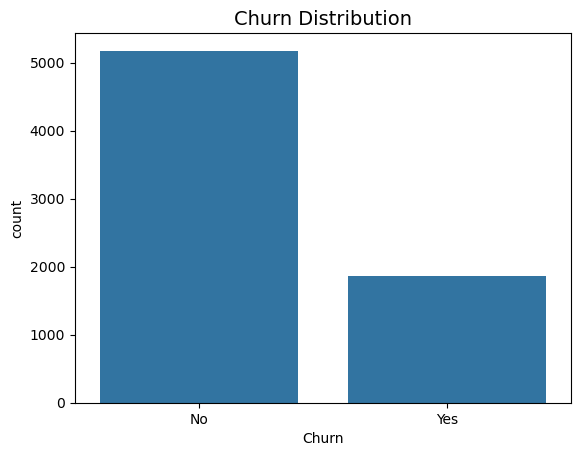

In [592]:
sns.countplot(data=data, x = "Churn")
plt.title("Churn Distribution", fontsize = 14)
plt.show()

#### 1.7 Let Visualize The Distribution of MonthlyCharge by Churn

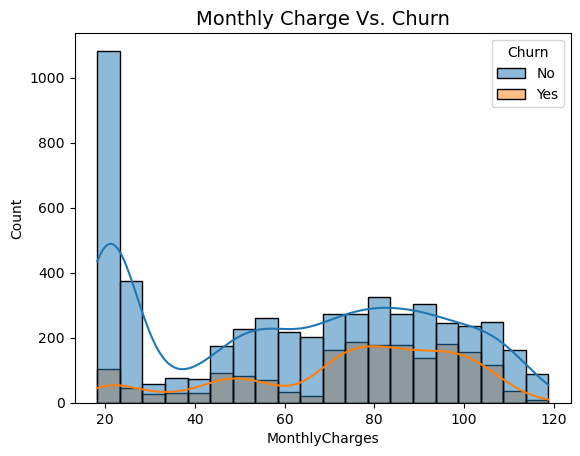

In [595]:
sns.histplot(data=data, x= "MonthlyCharges", hue="Churn", kde=True, bins=20)
plt.title("Monthly Charge Vs. Churn", fontsize = 14)
plt.show()

### 2. Data Cleaning & Preprocessing
###### in This Step We’ll fix missing values, encode categorical features, and prepare the dataset for modeling.

#### 2.1 Handle Missing Values

In [599]:
# Checking the Missing Values
print(data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [601]:
# Drop Rows With Missing Values in TotalCharges column
data = data[data["TotalCharges"].notnull()].copy()

In [603]:
data.isnull().sum() # No More Missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2.2 Drop Irrelevant Columns
###### We Don't Need Customer ID, It Is Not Important For Our Model To Lear About it

In [605]:
data.drop("customerID", axis = 1, inplace = True)

#### 2.3 Encoding The Target Variable
###### We'll Convert The Churn to 1 (Yes) And 0 (No):

In [609]:
data["Churn"] = data["Churn"].map({"Yes": 1 , "No":0})

#### 2.4 Encode Categorical Features

###### We’ll identify all object-type features and use One-Hot Encoding.

In [612]:
# Get Categorical Columns
cat_cols = data.select_dtypes(include="object").columns.tolist()

In [614]:
# One-hot encode
data_encoded = pd.get_dummies(data, columns=cat_cols , drop_first = True )

#### 2.5 Let Check Our Final Dataset 

In [617]:
# Check for The Updated Shape
data_encoded.shape

(7032, 31)

In [619]:
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### 3. Feature Selection & Engineering


#### 3.1 Separate Features and Target

In [623]:
x = data_encoded.drop("Churn", axis=1)
y = data_encoded["Churn"]

#### 3.2 Train-Test-Split : Let Split Our Features and Target in TWo Parts each, Training Set and Testing Set. Before Scaling

In [626]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, stratify=y, random_state=42)
# We use stratify=y to keep the churn distribution balanced.

#### 3.3 Scale Numerical Features
###### We’ll scale the features using StandardScaler, but only for numeric columns.

In [629]:
# Getting Numeric Columns

num_col = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [631]:
# Create Object scaler

scaler = StandardScaler()

In [633]:
# Fit and transform training, only transform test

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

#### 3.4 Feature Importance (Optional Preview)
###### We’ll revisit this after model training, but you can preview with:

In [636]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<Axes: >

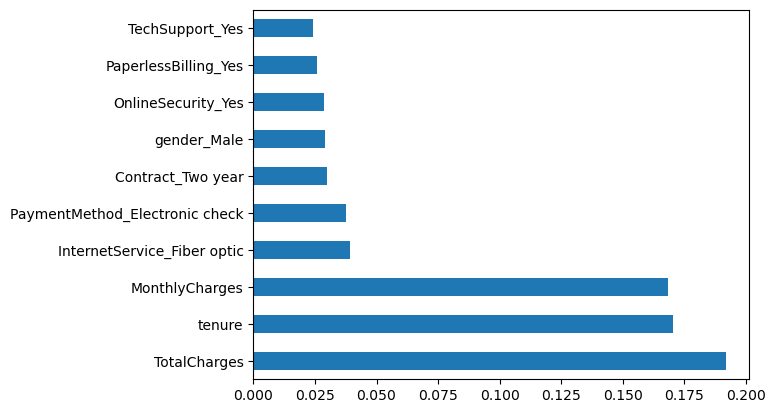

In [637]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')

### 4. Model Selection and Training

#### 4.1 Train a Baseline Model (Logistic Regression)

In [642]:
# Creation of Objet lr (Initilize) and training
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [644]:
# Prediction
y_pred_lr = lr.predict(X_test)

In [646]:
#Evaluation
print("Logistic Regression Repport:\n", classification_report(y_test, y_pred_lr))
print("confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Repport:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

confusion Matrix:
 [[918 115]
 [159 215]]


#### 4.2 Train a Tree-Based Model (XGBoost)

In [649]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [651]:
# Prediction 
y_pred_xgb = xgb.predict(X_test)

In [653]:
# Evaluation
print("XGBoost Report:\n", classification_report(y_test,y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

Confusion Matrix:
 [[890 143]
 [169 205]]


##### XBoost is often more accurate and interpretable than other models.XBoost is often more accurate and interpretable than other models.

#### 4.3 Compare Models Using AUC

##### Why AUC?

###### When you’re solving a classification problem, especially with imbalanced classes, AUC-ROC is one of the most powerful ways to compare ###### models. It measures how well a model distinguishes between the classes — the higher the AUC, the better.
###### 	•	AUC = 1.0 → Perfect classifier
###### 	•	AUC = 0.5 → No better than random
###### 	•	AUC < 0.5 → Worse than random

⸻

##### Our Goal Now: Train and Compare Multiple Models We’ll:
##### 	1.	Train multiple classifiers
##### 	2.	Predict probabilities (not just 0/1)
##### 	3.	Calculate and compare their ROC AUC scores
##### 	4.	Plot their ROC curves on one graph


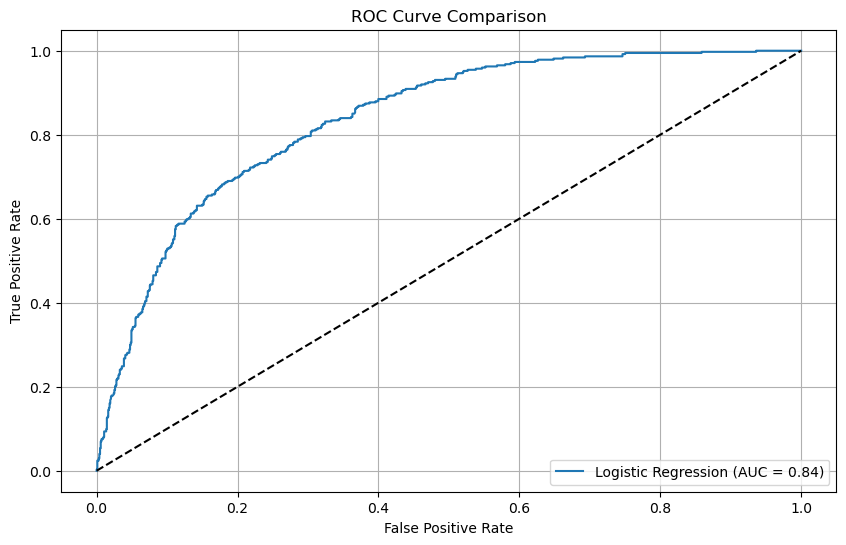

AUC Scores:
Logistic Regression: 0.8361


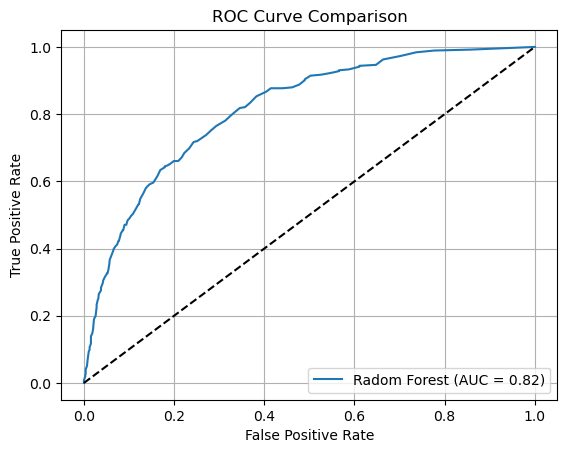

AUC Scores:
Logistic Regression: 0.8361
Radom Forest: 0.8160


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


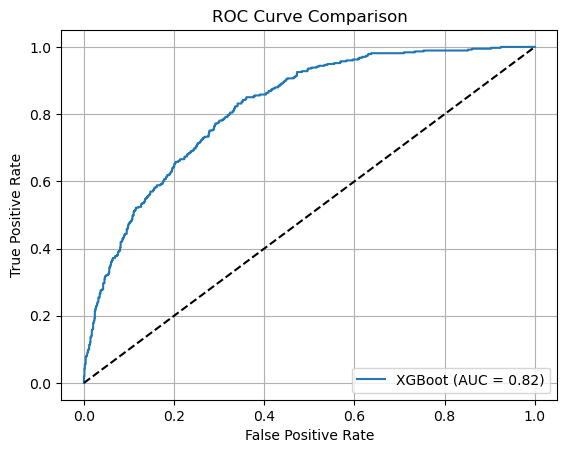

AUC Scores:
Logistic Regression: 0.8361
Radom Forest: 0.8160
XGBoot: 0.8197


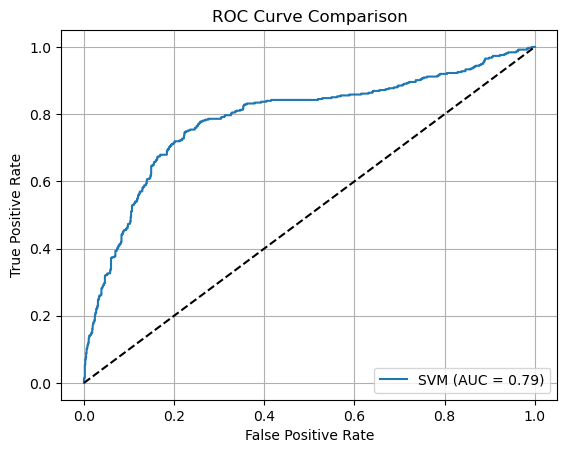

AUC Scores:
Logistic Regression: 0.8361
Radom Forest: 0.8160
XGBoot: 0.8197
SVM: 0.7880


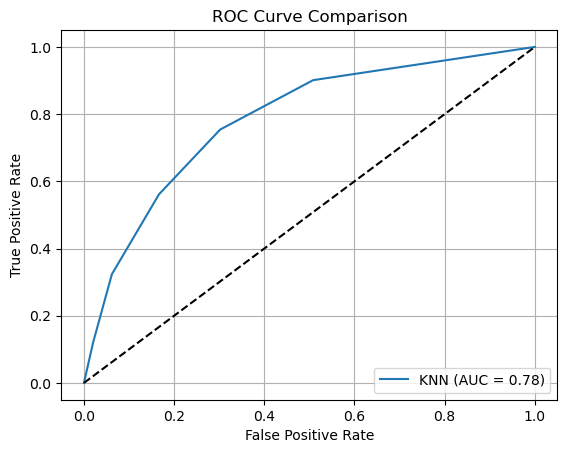

AUC Scores:
Logistic Regression: 0.8361
Radom Forest: 0.8160
XGBoot: 0.8197
SVM: 0.7880
KNN: 0.7840


In [657]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Radom Forest" : RandomForestClassifier(),
    "XGBoot" : XGBClassifier(use_label_encoder = False, eval_metric='logloss'), 
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}
 
# Dictionary to Store AUC Score
auc_scores = {}

# Plot ROC Curves
plt.figure(figsize =(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)

    # Get probability scores
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    auc_scores[name] = auc

    # Get ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

    # Plot formartting
    plt.plot([0, 1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # Display AUC scores
    print('AUC Scores:')
    for name, score in auc_scores.items():
        print(f"{name}: {score:.4f}")



#### 📘 Explanation
##### 	•	.predict_proba(X_test)[:, 1]: gets the probability for the positive class.
##### 	•	roc_auc_score(): computes the AUC value.
##### 	•	roc_curve(): gives you FPR and TPR for plotting.
##### 	•	We’re training each model once, and comparing them visually and numerically.


#### 4.4 Seanborn Barplot of Model AUC Scores() 

/var/folders/9z/f6q6wx894fsb42jvb5wrs_kr0000gn/T/ipykernel_15780/904712848.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AUC', y='Model', data=auc_df, palette='viridis')


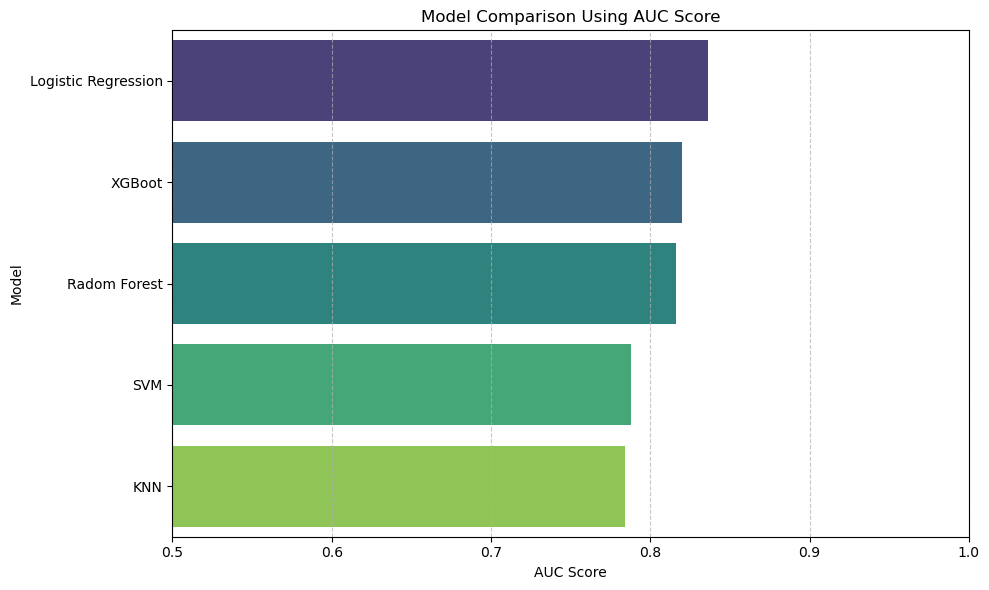

In [660]:
# Convert AUC scores dictionary to DataFrame
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
auc_df = auc_df.reset_index().rename(columns={'index': 'Model'})

# Sort by AUC
auc_df = auc_df.sort_values(by='AUC', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AUC', y='Model', data=auc_df, palette='viridis')

plt.title('Model Comparison Using AUC Score')
plt.xlabel('AUC Score')
plt.ylabel('Model')
plt.xlim(0.5, 1.0)  # Optional: if you want consistent scale
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5. Hyperparameter Tuning (for Top Model)

We’ll focus on tuning the top 3 models based on the AUC results from Step 4. 
If you confirmed that these are:
	•	Random Forest
	•	XGBoost
	•	Logistic Regression (or SVM/KNN if they performed better)

We’ll tune them using GridSearchCV or RandomizedSearchCV from sklearn.
Here’s the code broken into parts for clarity and copy-paste ease.

#### 5.1 Import Require Libraries

#### 5.2 Hyperparameter Tuning: Random forest OUR BEST MODEL

In [725]:
rf = RandomForestClassifier(random_state = 42)

param_grid_rf = {
    'n_estimators':[100, 200, 300],
    'max_depth':[None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid_rf, 
    scoring='roc_auc', 
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Best RF AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best RF AUC: 0.8375247837408306


#### 5.3 Hyperparameter Tuning : XGBoost

In [667]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 1.0]
}

grid_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                              scoring='roc_auc', cv=5, n_iter=10,
                              n_jobs=-1, verbose=1, random_state=42)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

print("Best XGB AUC:", roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best XGB AUC: 0.8385083682333269


#### 5.3 Hyperparameter Tuning : Logistic Regression

In [695]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg,
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

grid_logreg.fit(X_train, y_train)
best_logreg = grid_logreg.best_estimator_

print("Best LR AUC:", roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best LR AUC: 0.8353647804277039


#### 5.4 Compare Tuned AUC Score

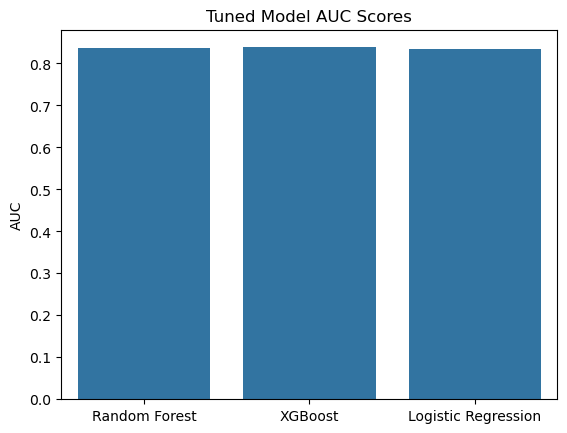

In [697]:
auc_scores_tuned = {
    'Random Forest': roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]),
    'XGBoost': roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]),
    'Logistic Regression': roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1]),
}

sns.barplot(x=list(auc_scores_tuned.keys()), y=list(auc_scores_tuned.values()))
plt.title('Tuned Model AUC Scores')
plt.ylabel('AUC')
plt.show()

### 6. Model Interpretability & Explainability

(“Why does the model make that prediction?”)

We’ll now explore why your top model makes decisions, using:
	•	Feature importance (for tree-based models)
	•	SHAP values (for deep insight into individual predictions)

1. Feature Importance (for Random Forest / XGBoost)

If your best model is a tree-based model, here’s how to extract and visualize feature importance:

#### 6.1 Feature importance(for Random Forest XGBoost)

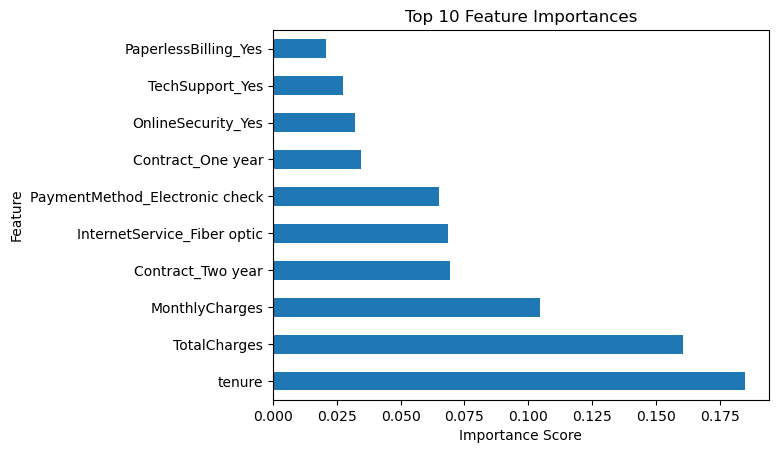

In [703]:
# For Random Forest or XGBoost
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

##### Swap best_rf with best_xgb if XGBoost was Best

#### A. Used SHAP for XGBoost or Random Forest

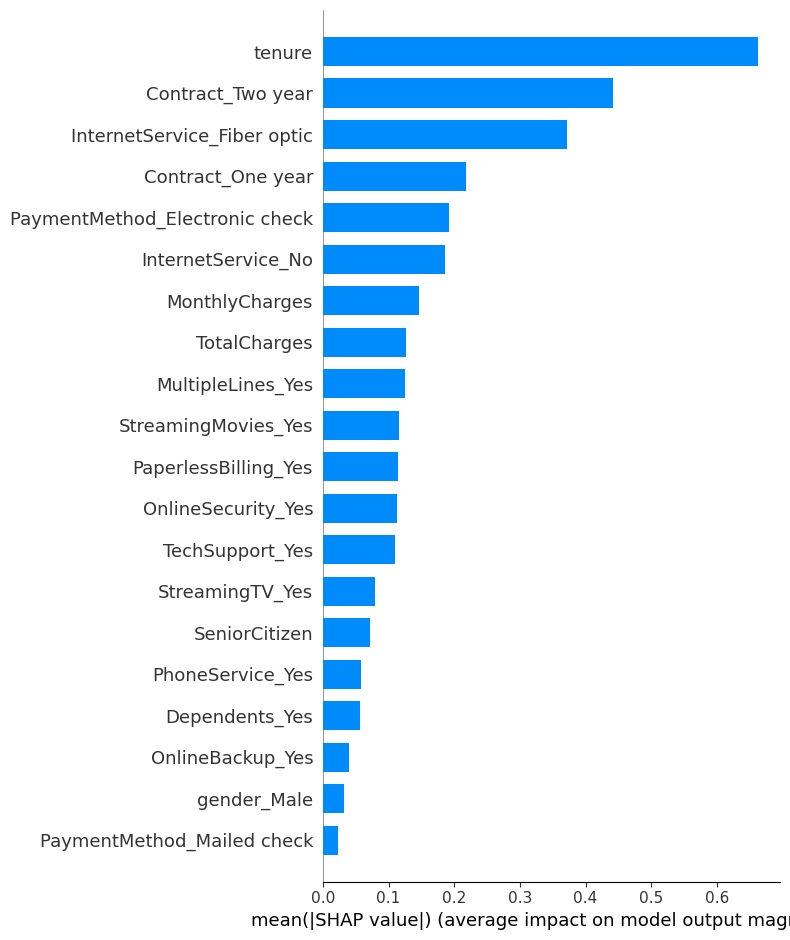

In [707]:
import shap

explainer = shap.TreeExplainer(best_xgb)  # or best_rf
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

#### B. Detailed Force Plot (For Single Prediction)

In [731]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

## Working on the Best Model

In [760]:
model = RandomForestClassifier(random_state = 42)

# Set Up Your model and hyperparameters
param_grid = {
    'n_estimators':[100, 200],
    'max_depth':[None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform grid Search
grid = GridSearchCV( model, param_grid, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)

# Save the Best Model from tuning
#best_model = grid.best_estimator_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [774]:
y_pred = grid.predict(X_test)

#### Save the Model With Joblib

In [712]:
import joblib

In [772]:
best_model = grid.best_estimator_
joblib.dump(best_model, "final_model.pkl")

['final_model.pkl']

#### To Load The Model later

In [ ]:
loaded_model = joblib.load('models/best_rf_model.pkl')
y_pred = loaded_model.predict(X_test)

# MACHINE LEARNING PROJECT TO PREDICT CUSTOMER CHURN

#### Realise by 
##### Mr. Ray Nangaa Bakaato : Junior Data Scientist 